In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import h5py

In [47]:
os.listdir('../result/cam')

['2f04dd2a-bbbf-11e8-b2ba-ac1f6b6435d0.npy',
 'a686c226-bb9e-11e8-b2b9-ac1f6b6435d0.npy',
 '057ccfb0-bbb2-11e8-b2ba-ac1f6b6435d0.npy',
 '220598d8-bbb2-11e8-b2ba-ac1f6b6435d0.npy',
 'c84b5738-bb9d-11e8-b2b9-ac1f6b6435d0.npy',
 '77132d7e-bbc4-11e8-b2bc-ac1f6b6435d0.npy',
 '91f4385e-bbbf-11e8-b2bb-ac1f6b6435d0.npy',
 'f0fd699e-bba9-11e8-b2ba-ac1f6b6435d0.npy',
 '38df3154-bbc6-11e8-b2bc-ac1f6b6435d0.npy',
 '55e0eb16-bbb3-11e8-b2ba-ac1f6b6435d0.npy',
 '6aa0983c-bba2-11e8-b2b9-ac1f6b6435d0.npy',
 '3154dc36-bbc6-11e8-b2bc-ac1f6b6435d0.npy',
 'b3a3c22e-bbc6-11e8-b2bc-ac1f6b6435d0.npy',
 'eecc6a94-bb9a-11e8-b2b9-ac1f6b6435d0.npy',
 'f6cad70a-bba7-11e8-b2ba-ac1f6b6435d0.npy',
 '4b762f74-bbc7-11e8-b2bc-ac1f6b6435d0.npy',
 '5f21f402-bba6-11e8-b2ba-ac1f6b6435d0.npy',
 'ae386ee8-bbbc-11e8-b2ba-ac1f6b6435d0.npy',
 'eb52baf6-bbab-11e8-b2ba-ac1f6b6435d0.npy',
 'af8aa366-bbb6-11e8-b2ba-ac1f6b6435d0.npy',
 'd111dee4-bba9-11e8-b2ba-ac1f6b6435d0.npy',
 'd47f4744-bbac-11e8-b2ba-ac1f6b6435d0.npy',
 '3c2bdd3c

In [48]:
IMG_NAME = '2f04dd2a-bbbf-11e8-b2ba-ac1f6b6435d0'
cam = np.load(f'../result/cam/{IMG_NAME}.npy',allow_pickle=True).item()

In [49]:
cam

{'keys': tensor([0, 2]),
 'cam': tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0199, 0.0199, 0.0199],
          [0.0000, 0.0000, 0.0000,  ..., 0.0199, 0.0199, 0.0199],
          [0.0000, 0.0000, 0.0000,  ..., 0.0199, 0.0199, 0.0199]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0006, 0.0025,  ..., 0.0062, 0.0016, 0.0000],
          [0.0006, 0.0031, 0.0135,  ..., 0.0281, 0.0062, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0088, 0.0073, 0.0073],
          [0.0000, 0.0000, 0.0000,  ..., 0.0056, 0.0045, 0.0045],
          [0.0000, 0.0000, 0.0000,  ..., 0.0056, 0.0045, 0.0045]]]),
 'high_res': array([[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.      

In [6]:
os.listdir('../result/ins_seg')

['a686c226-bb9e-11e8-b2b9-ac1f6b6435d0.npy',
 '057ccfb0-bbb2-11e8-b2ba-ac1f6b6435d0.npy',
 '220598d8-bbb2-11e8-b2ba-ac1f6b6435d0.npy',
 'c84b5738-bb9d-11e8-b2b9-ac1f6b6435d0.npy',
 'f0fd699e-bba9-11e8-b2ba-ac1f6b6435d0.npy',
 '55e0eb16-bbb3-11e8-b2ba-ac1f6b6435d0.npy',
 'eecc6a94-bb9a-11e8-b2b9-ac1f6b6435d0.npy',
 'f6cad70a-bba7-11e8-b2ba-ac1f6b6435d0.npy',
 '5f21f402-bba6-11e8-b2ba-ac1f6b6435d0.npy',
 'd111dee4-bba9-11e8-b2ba-ac1f6b6435d0.npy',
 '3c2bdd3c-bba1-11e8-b2b9-ac1f6b6435d0.npy',
 '66f4d68a-bba7-11e8-b2ba-ac1f6b6435d0.npy',
 '9291fda4-bbac-11e8-b2ba-ac1f6b6435d0.npy',
 '4488f6b6-bbad-11e8-b2ba-ac1f6b6435d0.npy',
 'c2d75614-bbaa-11e8-b2ba-ac1f6b6435d0.npy',
 '314c2662-bbae-11e8-b2ba-ac1f6b6435d0.npy',
 'c2c546c8-bba9-11e8-b2ba-ac1f6b6435d0.npy',
 'ab325aec-bbb2-11e8-b2ba-ac1f6b6435d0.npy',
 '42459662-bb9d-11e8-b2b9-ac1f6b6435d0.npy',
 'af46a966-bba4-11e8-b2ba-ac1f6b6435d0.npy',
 'daca4842-bbb1-11e8-b2ba-ac1f6b6435d0.npy',
 'a931388e-bba4-11e8-b2ba-ac1f6b6435d0.npy',
 '1d223be2

In [102]:
train_base_df = pd.read_csv('../data/train_fold_v6.csv')
fold = 0
train_df = train_base_df#[train_base_df['fold'] != fold]

In [4]:
train_df.head()

,ID,Label,0,1,2,3,4,5,6,7,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,is_single
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,15,15,NaN
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,3,17,17,NaN
4,5e22a522-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,10,9,NaN
5,5f79a114-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,15,15,NaN
6,5c68183e-bb99-11e8-b2b9-ac1f6b6435d0,13|0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,10,10,NaN


In [103]:
IMG_NAME = 'acb1bdf6-bbb0-11e8-b2ba-ac1f6b6435d0'
info = train_df[train_df['ID']==IMG_NAME]
print('this is the class ',info.Label.values[0])
instance = np.load(f'../result/ins_seg/{IMG_NAME}.npy',allow_pickle=True).item()

PATH = '../data/train_h5_irn_512_v1'
hdf5_path = os.path.join(PATH,f'{IMG_NAME}.hdf5')
with h5py.File(hdf5_path,"r") as h:
    img = h['train_img'][...]

this is the class  7|0


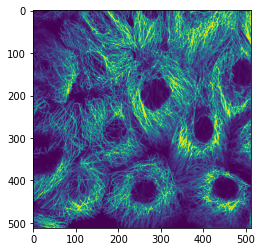

In [104]:
plt.imshow(img[:,:,0])

In [105]:
instance

{'score': array([0.6694797 , 0.31636554, 0.54754114, 0.8922399 , 0.940087  ,
        1.        , 0.6823471 , 0.9815641 , 0.8333285 , 0.6207072 ],
       dtype=float32),
 'mask': array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ...,

In [106]:
### viz mask
vv = instance['mask'].transpose(1,2,0)*1.
mask = np.zeros(vv.shape[:2])
for i in range(1,vv.shape[-1]+1):
#for i in range(1,5):
    #print(i)
    true_points = np.argwhere(vv[:,:,i-1])
    top_left = true_points.min(axis=0)
    bottom_right = true_points.max(axis=0)
    cropped_arr = vv[:,:,i-1][top_left[0]:bottom_right[0]+1,top_left[1]:bottom_right[1]+1]
    AREA = cropped_arr.shape[0] * cropped_arr.shape[1]
    
    if AREA > 1000:
        print(AREA)
        mask = mask + vv[:,:,i-1]*i

19760
6726
52008
27416
47235
73370
11433
95000
26055
21735


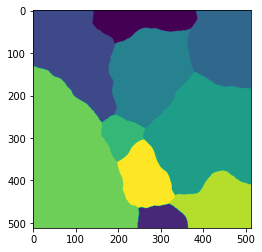

In [107]:
plt.imshow(mask)

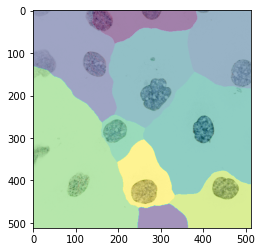

In [108]:
plt.imshow(img)
plt.imshow(mask, alpha=0.5)

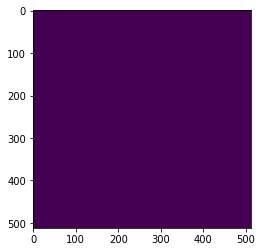

In [50]:
plt.imshow(mask)